<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Neural%20Network%20Regression/medical_insurance_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Model

A simple model which will predict the insurance cost based on a few inputs using a Kaggle Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance 

In [3]:
# Import libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
# One hot encoding dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [44]:
# Creating X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [45]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [46]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [49]:
# Build neural network like model_2
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 4ms/step - loss: 8612.4854 - mae: 8612.4854
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7884.7114 - mae: 7884.7114
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7616.3950 - mae: 7616.3950
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7534.1963 - mae: 7534.1963
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7747.4893 - mae: 7747.4893
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7604.8037 - mae: 7604.8037
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7532.9595 - mae: 7532.9595
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7752.6304 - mae: 7752.6304
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.4189 - mae: 7613.4189
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7750.1221 - mae: 7750.1221

In [11]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6420.8540 - mae: 6420.8540


[6420.85400390625, 6420.85400390625]

In [12]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving the Model

1. Add extra layer w/ more hidden units and used Adam optimizer
2. Train for longer



In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ more layers
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13300.5361 - mae: 13300.5361
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13144.0410 - mae: 13144.0410
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12809.6689 - mae: 12809.6689
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12143.4326 - mae: 12143.4326
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11020.7939 - mae: 11020.7939
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9577.4277 - mae: 9577.4277
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8237.1865 - mae: 8237.1865
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7560.3848 - mae: 7560.3848
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7441.3926 - mae: 7441.3926
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7420.1924 - mae:

In [56]:
# Evaluate model2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4876.6079 - mae: 4876.6079


[4876.60791015625, 4876.60791015625]

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [54]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3508.4146 - mae: 3508.4146


[3508.41455078125, 3508.41455078125]

In [17]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6420.8540 - mae: 6420.8540


[6420.85400390625, 6420.85400390625]

Text(0.5, 0, 'epochs')

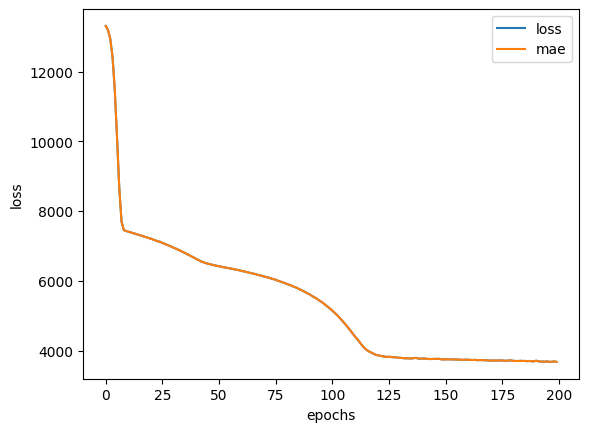

In [55]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms or scalaing values, neural networks tend to prefer normalization

try both and see which performs better

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data use Scikit-Learn

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in columns b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(X_train)

# Transform training and test data w/ normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 

In [21]:
# How data looks
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [22]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [23]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Goal of normalization is to get the above value ranges on a similar scale w/o distorting the differences in range of values.
Ex: Get all the above values only b/w 0 and 1 w/o changing differences or distribution

Train a new neural network model on the normalized data

In [27]:
# Build neural network model to fit normalized data

# Set rand seed
tf.random.set_seed(42)

# 1. Create Model
normalized_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
normalized_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit Model
normalized_model.fit(X_train_normal, y_train, epochs=100)



Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.9023 - mae: 13342.9023
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.2666 - mae: 13333.2666
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13309.6465 - mae: 13309.6465
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13261.8896 - mae: 13261.8896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13179.4307 - mae: 13179.4307
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13051.5205 - mae: 13051.5205
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12867.8330 - mae: 12867.8330
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12618.2637 - mae: 12618.2637
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12292.6367 - mae: 12292.6367
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11887.86

In [28]:
# Evaluate normalized model
normalized_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.8987 - mae: 3439.8987


[3439.898681640625, 3439.898681640625]

In [57]:
# Compared to model_2
# 9/9 [==============================] - 0s 2ms/step - loss: 4876.6079 - mae: 4876.6079
# [4876.60791015625, 4876.60791015625
# w/ same training time and everything else except normalized data, significant decrease in loss

### Improving Normalized Model
- train longer (model2 - slight improvement from original)
- add more layers (model3 - not much improvement from original)
- combo of both (model4 - not much improvment from model2)

In [58]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create Model
normalized_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
normalized_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit Model
normalized_model2.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.4834 - mae: 13344.4834
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13336.2588 - mae: 13336.2588
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13315.4248 - mae: 13315.4248
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13271.1494 - mae: 13271.1494
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13192.0303 - mae: 13192.0303
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.8125 - mae: 13066.8125
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12885.1621 - mae: 12885.1621
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12637.0449 - mae: 12637.0449
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12312.3418 - mae: 12312.3418
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11907.32

In [59]:
normalized_model2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.8804 - mae: 3171.8804


[3171.88037109375, 3171.88037109375]

In [60]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create Model
normalized_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
normalized_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit Model
normalized_model3.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 13291.1211 - mae: 13291.1211
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 12430.0801 - mae: 12430.0801
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 9290.7734 - mae: 9290.7734
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 7843.2197 - mae: 7843.2197
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7505.7974 - mae: 7505.7974
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7138.6006 - mae: 7138.6006
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 6622.7227 - mae: 6622.7227
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 5887.3955 - mae: 5887.3955
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 4856.4263 - mae: 4856.4263
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3964.0225 - mae: 3964.

In [61]:
normalized_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3181.4834 - mae: 3181.4834


[3181.4833984375, 3181.4833984375]

In [62]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create Model
normalized_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
normalized_model4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit Model
normalized_model4.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 2s 7ms/step - loss: 13283.6055 - mae: 13283.6055
Epoch 2/200
34/34 [==============================] - 0s 9ms/step - loss: 12355.4121 - mae: 12355.4121
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 9172.2871 - mae: 9172.2871
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 7827.8970 - mae: 7827.8970
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7481.6802 - mae: 7481.6802
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7105.9766 - mae: 7105.9766
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6575.0991 - mae: 6575.0991
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 5809.6079 - mae: 5809.6079
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 4748.0239 - mae: 4748.0239
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 3893.9802 - mae: 3893.

In [63]:
normalized_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.4590 - mae: 3163.4590


[3163.458984375, 3163.458984375]